# Ungraded Lab: Cost Function for Logistic Regression

## Goals
In this lab you will:
- In this lab, you will implement the cost function for logistic regression.

## Dataset 
Let's start with the same dataset as before.

In [1]:
import numpy as np

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)

We'll use a helper function to plot this data. The data points with label $y=1$ are shown as red crosses, while the data points with label $y=0$ are shown as black circles.

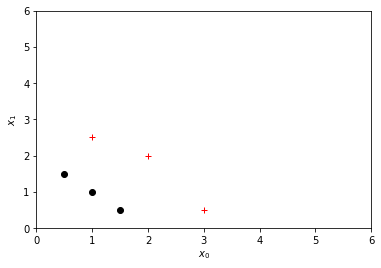

In [2]:
from lab_utils import plot_data
import matplotlib.pyplot as plt

plot_data(X,y)

# Set both axes to be from 0-6
plt.axis([0, 6, 0, 6])
# Set the y-axis label
plt.ylabel('$x_1$')
# Set the x-axis label
plt.xlabel('$x_0$')
plt.show()

## Cost function

First, you will implement a non-vectorized version of the cost function. Then, you will implement a vectorized version.


### Non- vectorized version

Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ cost(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset 

* $cost(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$cost(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label


* For a logistic regression model for the dataset given above, the model can be representented as:

    $f_{\mathbf{w},b}(x) = g(w_0x_0 + w_1x_1 + b) = g(\mathbf{x^Tw} + b)$

    where $g(z)$ is the sigmoid function:

    $g(z) = \frac{1}{1+e^{-z}}$ 
 

#### Side Note: sigmoid function implementation
We've implemented the `sigmoid` function for you already and you can simply import and use it, as shown in the code block below.

In [3]:
from lab_utils import sigmoid 

print(sigmoid(0))

0.5


<a name='ex-02'></a>
#### Exercise 

Please complete  the `compute_cost_logistic_loop`:
- Create a variable outside the loop to store the costs
- Loop over all examples in the training set.
    - calculate the cost for each training example 
        - Calculate `z`
        - $ z =  w_0x_0^{(i)} + w_1x_1^{(i)} + b = \mathbf{x}^{(i)T}\mathbf{w} +b $
        - Predict `f` where `g` is the sigmoid function
            - $ f =  g(z) $
        - Calculate the cost for each example  
            $cost =  (-y^{(i)} * \log f) - ((1 - y^{(i)})\log( 1 - f))$
     - Add this cost to the total cost variable created outside the loop   
- Get the sum of cost from all iterations and return the total divided by the number of examples.


As you are doing this, remember that the variables X_train and y_train are not scalar values but matrices of shape ($m, n$) and ($𝑚$,1) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.


<details>
  <summary><font size="2" color="darkgreen"><b>Hints</b></font></summary>
    
```python     
def compute_cost_logistic_loop(X, y, w, b):
    """
    Computes the cost over all examples
    Args:
      X : (array_like Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,1)) target value 
      w : (array_like Shape (n,1)) Values of parameters of the model      
      b : (array_like Shape (n,1)) Values of bias parameter of the model
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    cost = 0.
    for i in range(m):
        ### BEGIN SOLUTION ###  
        z = 0
        for j in range(n):
            z = z + w[j] * X[i][j]
        z = z + b
        f = sigmoid(z)
        
        cost +=  -y[i]*np.log(f) - (1-y[i])*np.log(1-f)
        ### END CODE HERE ### 
             
    total_cost = (1/m) * cost
    return total_cost[0] 
```
</details>

In [4]:
def compute_cost_logistic_loop(X, y, w, b):
    """
    Computes the cost over all examples
    Args:
      X : (array_like Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,1)) target value 
      w : (array_like Shape (n,1)) Values of parameters of the model      
      b : (array_like Shape (n,1)) Values of bias parameter of the model
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    cost = 0.
    for i in range(m):
        ### START CODE HERE ### 
        ### BEGIN SOLUTION ###  
        z = 0
        for j in range(n):
            z = z + w[j] * X[i][j]
        z = z + b
        f = sigmoid(z)
        
        cost +=  -y[i]*np.log(f) - (1-y[i])*np.log(1-f)
        ### END SOLUTION ###  
        ### END CODE HERE ### 
             
    total_cost = (1/m) * cost
    return total_cost[0]

Check the implementation of your cost function using the cell below.

In [5]:
# note, w is defined as a column vector
w = np.array([1,1]).reshape(-1,1)
b = -3
print(compute_cost_logistic_loop(X, y, w, b))

0.3668667864055174


**Expected output**: 0.3668667864055174

Now, let's see what the cost function output is for a different value of $w$. 

* In the last ungraded lab, you plotted the decision boundary for  $b = -3, w_0 = 1, w_1 = 1$. That is, you had `w = np.array([-3,1,1])`.

* Let's say you want to see if $b = -4, w_0 = 1, w_1 = 1$, or `w = np.array([-4,1,1])` provides a better model.

Let's first plot the decision boundary for these two different $b$ values to see which one fits the data better.

* For $b = -3, w_0 = 1, w_1 = 1$, we'll plot $-3 + x_0+x_1 = 0$ (shown in blue)
* For $b = -4, w_0 = 1, w_1 = 1$, we'll plot $-4 + x_0+x_1 = 0$ (shown in magenta)

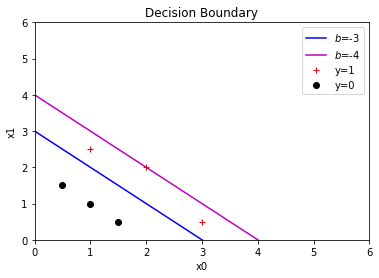

In [7]:
import matplotlib.pyplot as plt

# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

# Plot the decision boundary
plt.plot(x0,x1, c="b", label="$b$=-3")
plt.plot(x0,x1_other, c="m", label="$b$=-4")
plt.axis([0, 6, 0, 6])

# Plot the original data
plot_data(X,y)
# Set the y-axis label
plt.ylabel('x1')
# Set the x-axis label
plt.xlabel('x0')

plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

You can see from this plot that `w = np.array([-4,1,1])` is a worse model for our data. Let's see if you can see this from your cost function implementation as well.

In [8]:
w_array1 = np.array([1,1]).reshape(-1,1)
b_1 = -3
w_array2 = np.array([1,1]).reshape(-1,1)
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic_loop(X, y, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic_loop(X, y, w_array2, b_2))

Cost for b = -3 :  0.3668667864055174
Cost for b = -4 :  0.503680863674846


**Expected output**

Cost for b = -3 :  0.3668667864055174

Cost for b = -4 :  0.503680863674846


You can see that your cost function behaves as expected and the cost for `w = np.array([-4,1,1])` is indeed higher than the cost for `w = np.array([-3,1,1])`

### (Optional ) Vectorized version

You will now implement a vectorized version of the cost function.

The vectorized version of the cost function formula is 

$$ J(\mathbf{w},b) = \frac{1}{m} (-\mathbf{y}^T \text{log}(\mathbf{f_{w,b}}) - (1-\mathbf{y})^T  \text{log}(1-\mathbf{f_{w,b}}))$$ 

where

$$ \mathbf{f_{w,b}} = g(\mathbf{X} \mathbf{w})$$

As before, $g$ is the sigmoid function.



**Exercise**

You'll complete the vectorized cost function by implementing the following steps - 

* First, you'll compute the models prediction $f_{\mathbf{w},b}(x)$ as shown below

   ```
    f = sigmoid(X @ w) + b  
    #f = sigmoid(np.matmul(X,w) + b  # also works
    #f = sigmoid(np.dot(X,w) + b     # also works
    total_cost = (1/m)*(np.dot(-y, np.log(f)) - np.dot((1-y), np.log(1-f)))
   ```
  

* Then, you'll compute the cost as 

  ```
  total_cost = (1/m)*(np.dot(-y, np.log(f)) - np.dot((1-y), np.log(1-f)))
  ```

**Debugging Tip:** Vectorizing code can sometimes be tricky. One common strategy for debugging is to print out the sizes of the matrices you are working with using the size function. For example, given a data matrix $\mathbf{X}$ of size 6 × 3 (6 examples, 3 features) and $\mathbf{w}$, a vector with dimensions 3x0, you can observe that $\mathbf{Xw}$ is a valid multiplication operation, while $\mathbf{wX}$ is not.

In [9]:
def compute_cost_logistic_matrix(X, y, w, b):
    """
    Computes the cost over all examples
    Args:
      X : (array_like Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,1)) target value 
      w : (array_like Shape (n,1)) Values of parameters of the model      
      b : (array_like Shape (n,1)) Values of bias parameter of the model
    Returns:
      total_cost: (scalar)         cost 
    """
    m = X.shape[0]
    
    ### START CODE HERE ### 
    ### BEGIN SOLUTION ###  
    f = sigmoid(X @ w + b)
    total_cost = (1/m)*(np.dot(-y.T, np.log(f)) - np.dot((1-y).T, np.log(1-f)))
    ### END SOLUTION ###  
    ### END CODE HERE ### 
    
    return total_cost[0,0]

Now let's check if the output of this function is equivalent to the output of your non-vectorized implementation above.

In [10]:
print(f"Cost computed by non-vectorized version: {compute_cost_logistic_loop(X, y, w, b)}")
print(f"Cost computed by vectorized version: {compute_cost_logistic_matrix(X, y, w, b)}")

Cost computed by non-vectorized version: 0.3668667864055174
Cost computed by vectorized version: 0.3668667864055174


**Expected output**

Cost computed by non-vectorized version:  0.3668667864055174

Cost computed by vectorized version:  0.3668667864055174
